### CS 512 Computer Vision
### Final Project
### Brain Tumor Classification using Convolutional Neural Network
*Authors*
- Kinjal Kachi (A20449343)
- Omkar Pawar (A20448802)

# Data Wrangling
In this notebook, we perform some data preprocessing on the data of Brain Images that we extracted and make the data ready to train models. The data that we have is in matlab format. The main task is to bring the data in python lists and split the data into training and validation sets.

In this notebook we also perform some exploratory data analysis to see the distribution of image labels and see how the brain images look.


Imports

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the data that we have extracted on the drive and append the images to a list. Make sure that along with the images, we have labels present with the data. We will seperate images and labels in the next step.

In [ ]:
#Converting all the data into Python list
from progressbar import ProgressBar
pbar = ProgressBar()

directory="/content/drive/My Drive/Colab Notebooks/dataset/dataset/imageData"
N=3064
data_list=[]

for i in pbar(range(1,N+1)):
    filepath=str(i)+".mat"
    data=h5py.File(os.path.join(directory,filepath),"r")
    data_list.append(data)

100% (3064 of 3064) |####################| Elapsed Time: 0:15:18 Time:  0:15:18


In [ ]:
len(data_list)

3064

Now that we have all the images and labels in a lists, we seperate them into features and labels, where features are the images and labels are the image labels. We only take the images that are of shape (512,512). There are few images with other shape. In order to maintain the consistency in the data, we remove these images.

In [ ]:
#Extracting image data from Python List
pbar = ProgressBar()
features=[]
labels=[]

for i in pbar(range(N)):
    image=data_list[i]["cjdata"]["image"].value

    if image.shape==(512,512):
        image=np.expand_dims(image,axis=0)
        features.append(image)
        
        label=int(data_list[i]["cjdata"]["label"].value)-1
        labels.append(label)

print("We removed ",(len(data_list) - len(features)), " images which had different shape than (512,512)")

N/A% (0 of 3064) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  del sys.path[0]
100% (3064 of 3064) |####################| Elapsed Time: 0:00:14 Time:  0:00:14


We removed  15  images which had different shape than (512,512)


Hence, we can see that we removed 15 images with inconsistent shapes. Now we have all the data with same shape. Lets view the images of brain in next step.

#Image Viewer
Here we view the images of brain scans that we have stored in the feature list. We pass a index value to the function and it shows the image at that index.

Enter the index between 0 to 3048 to view the image of the brain scan at that index
3048
The label of the image is :  0


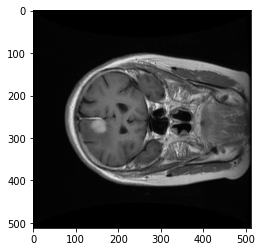

In [ ]:
def image_viewer(index):
  idx = int(index)
  plt.imshow(features[idx].reshape(512,512),cmap="gray")
  print("The label of the image is : ", labels[idx])

#input = raw_input("Enter the index between 0 to 3063 to view the image of the brain scan at that index")
image_viewer(input("Enter the index between 0 to 3048 to view the image of the brain scan at that index\n"))

In next step, we see how the labels are ditributed. First we print the total number of unique labels that we have. 

# Data Label Distribution

In [ ]:
np.unique(labels)

array([0, 1, 2])

There are total 3 labels in our data. Each label shows a type of tumor.
- 0 for *Meningioma*
- 1 for *Glioma*
- 2 for *Pituitary tumor*

In the report you will see the labels as 1,2,3. We changed the labels to 0,1,2 for programming purposes.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

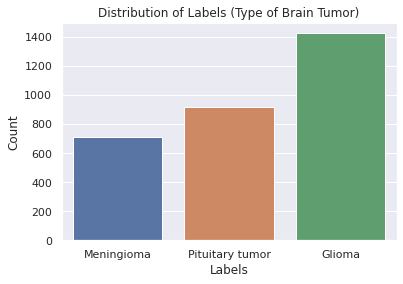

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df["Labels"] = np.char.mod('%d', labels)
sns.set_theme(style="darkgrid")
sns.countplot(df["Labels"])
my_xticks = ['Meningioma','Pituitary tumor','Glioma']
plt.xticks(range(len(my_xticks)), my_xticks)
plt.title("Distribution of Labels (Type of Brain Tumor)")
plt.ylabel("Count")

We can see that the labels are unevenly distributed. Hence we need to make sure that while we split the data, we split it in proportion to what we have in the original set, so that the training is done on all type of samples. To achieve this, we use straitified sampling. In the next step, we split the data into training and validation sets using stratified sampling
# Stratified Sampling for Training and Validation Set
We keep 33% of the data for validation and use rest for testing.

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, labels, test_size=0.33, random_state=42,stratify = labels)

# Save the data to file
Once we have the sets ready, we save them to a pickle file so that we can use them for training the model. 

In [ ]:
# Saving data as a pickle file
import pickle
braindata=[features_train,target_train,features_test,target_test]

with open("/content/drive/My Drive/Colab Notebooks/dataset/newbraindata_stratified.pickle","wb") as file:
  pickle.dump(braindata,file)

Hence, to summarize the steps that we performed here, 
- Load the data in .mat format
- Convert the data to python list/ numpy array
- Remove images with inconsistent shape
- View the brain scans according to index
- Plot the distribution of labels
- Implement Stratified Sampling to get training and validation sets.